# Web crawler

In [1]:
import requests
import re
import json
from lxml import etree
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
}
url ='https://www.bilibili.com/bangumi/play/ss27049?spm_id_from=333.337.0.0'
resp = requests.get(url, headers=headers)
print(resp.status_code)
text = resp.content.decode('utf-8')
result = re.findall(r'window.__INITIAL_STATE__=(.*?);', text)
comment_data = {}
if result:
    data = json.loads(result[0])
    epList = data.get('epList', [])
    for item in epList:
        cid = item.get('cid')
        comment_data[cid] = []
        url = f"https://comment.bilibili.com/{cid}.xml"
        res = requests.get(url)
        xml_data = res.content
        with open(f'./{cid}.xml', 'wb') as f:
            f.write(xml_data)
        soup = etree.HTML(xml_data)
        content_all = soup.xpath('//d')
        for content in content_all:
            data = content.xpath('string(.)')
            p = content.xpath('./@p')
            if not p:
                continue
            p = p[0]
            bullet_chat_time, _type, size, color, send_time, pool, uid, row_id, other = p.split(',')
            data = content.xpath('string(.)')
            comment_data[cid].append({
                "bullet_chat_time": bullet_chat_time,
                "type": _type,
                "size": size,
                "color": color,
                "send_time": send_time,
                "pool": pool,
                "uid": uid,
                "row_id": row_id,
                "other": other,
                "message": data
            })
            
with open('solitary', 'w', encoding='utf-8') as f:
    f.write(json.dumps(comment_data, indent=4, ensure_ascii=False))


200


# word cloud

In [3]:

import requests
from lxml import etree
import jieba
from pyecharts.charts import WordCloud
url = "https://comment.bilibili.com/207378394.xml"
# headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"}
res = requests.get(url)

xml = res.content
soup = etree.HTML(xml)
content_all = soup.xpath('//d')

#Crawl the Danmaku for word segmentation
wordList = []
for content in content_all:
    data = content.xpath('string(.)')
    words = jieba.lcut(data)
    wordList = wordList+words
wordDict = {}
for word in wordList:
    if len(word) > 1:
        if word not in wordDict.keys():
            wordDict[word] = 1
        else:
            wordDict[word] = wordDict[word]+1

#Word cloud visualization
wordCloud = WordCloud()
wordCloud.add(series_name="", data_pair=wordDict.items(),word_size_range=[20,80])
wordCloud.render("wordCloud1.html")

'C:\\Users\\罗文慧\\project\\wordCloud1.html'

In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple/

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


# Danmaku real-time quantity

1444.813
0.0
2229
第0分钟到第1分钟弹幕数: 156
第1分钟到第2分钟弹幕数: 74
第2分钟到第3分钟弹幕数: 81
第3分钟到第4分钟弹幕数: 86
第4分钟到第5分钟弹幕数: 104
第5分钟到第6分钟弹幕数: 91
第6分钟到第7分钟弹幕数: 118
第7分钟到第8分钟弹幕数: 83
第8分钟到第9分钟弹幕数: 143
第9分钟到第10分钟弹幕数: 247
第10分钟到第11分钟弹幕数: 65
第11分钟到第12分钟弹幕数: 91
第12分钟到第13分钟弹幕数: 84
第13分钟到第14分钟弹幕数: 102
第14分钟到第15分钟弹幕数: 93
第15分钟到第16分钟弹幕数: 83
第16分钟到第17分钟弹幕数: 117
第17分钟到第18分钟弹幕数: 56
第18分钟到第19分钟弹幕数: 79
第19分钟到第20分钟弹幕数: 74
第20分钟到第21分钟弹幕数: 48
第21分钟到第22分钟弹幕数: 40
第22分钟到第23分钟弹幕数: 61
第23分钟到第24分钟弹幕数: 50
第24分钟到第25分钟弹幕数: 3


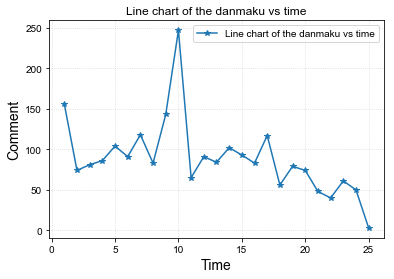

In [7]:
import json
import pandas as pd
from lxml import etree


with open('./207378394.xml', 'rb') as f:
    xml_data = f.read()

comment_list = []
soup = etree.HTML(xml_data)
content_all = soup.xpath('//d')
for content in content_all:
    p = content.xpath('./@p')
    if not p:
        continue
    p = p[0]
    bullet_chat_time, _type, size, color, send_time, pool, uid, row_id, other = p.split(',')
    data = content.xpath('string(.)')
    comment_list.append({
        "bullet_chat_time": bullet_chat_time,
        "type": _type,
        "size": size,
        "color": color,
        "send_time": send_time,
        "pool": pool,
        "uid": uid,
        "row_id": row_id,
        "other": other,
        "message": data
    })


with open('./r.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(comment_list, ensure_ascii=False, indent=4))

with open('./r.json',  encoding='utf-8') as f:
    data = f.read()

data = json.loads(data)
d_dict1 = {}

for item in data:
    for k, v in item.items():
        l1 = d_dict1.get(k, [])
        l1.append(v)
        d_dict1[k] = l1
t1 = 1 * 60
df = pd.DataFrame.from_dict(data)
df['bullet_chat_time'] = df['bullet_chat_time'].astype(float)
max_time = max(df['bullet_chat_time'])
print(max_time)
print(min(df['bullet_chat_time']))
print(df['bullet_chat_time'].shape[0])

title = []
number_list = []
for index, tt in enumerate(range(0, int(max_time), t1)):
    num = df['bullet_chat_time'][(df['bullet_chat_time'] >= tt) & (df['bullet_chat_time'] < (index + 1) * t1)].count()
    print(f"第{tt//60}分钟到第{(index + 1) * t1 // 60}分钟弹幕数: {num}")
    title.append((index + 1) * t1 // 60)
    number_list.append(num)

# from pyecharts.charts import *
#
# print(number_list)
# print(title)
# line = Line()
# line.add_xaxis(title)
# line.add_yaxis('时间', y_axis=number_list)
# line.render()

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
fig, ax= plt.subplots()
ax.set_title('Line chart of the danmaku vs time')  
ax.set_xlabel("Time", fontsize=14)  
ax.set_ylabel("Comment", fontsize=14)  

ax.plot(title, number_list, marker='*', label=u'Line chart of the danmaku vs time')  # Abscissa data + ordinate data + legend


# ax.plot(input_values,lst_temp10,marker='o',label=u'十月份')

plt.legend()  # Make legend effective
# Add gridlines
plt.grid(True, alpha=0.5, axis='both', linestyle=':')
plt.show()


In [8]:
import numpy as np

In [9]:
uid = df.groupby("uid").agg({"send_time" :np.sum})

# Number of Danmaku sent by the user

In [10]:
uid

,send_time
uid,
102a9d8c,1644158893
104e9d86,1659421394
10697f01,1660111740
107c0f1c,1656423791
10980718,1646356474
10a439cb,1650097841
10fadf1f,1661506622
10fed799,1654624303
112b611e,1657636095


In [11]:
data = {}
uid = df.groupby("uid")
for name, group in uid:
    key = len(group)
    val = data.get(f"{key}", 0)
    print(val)
    print(type(val))
    val += 1
    data[f"{key}"] = val

0
<class 'int'>
1
<class 'int'>
2
<class 'int'>
3
<class 'int'>
4
<class 'int'>
5
<class 'int'>
6
<class 'int'>
7
<class 'int'>
8
<class 'int'>
9
<class 'int'>
0
<class 'int'>
10
<class 'int'>
11
<class 'int'>
0
<class 'int'>
12
<class 'int'>
1
<class 'int'>
13
<class 'int'>
14
<class 'int'>
0
<class 'int'>
15
<class 'int'>
16
<class 'int'>
2
<class 'int'>
3
<class 'int'>
17
<class 'int'>
18
<class 'int'>
19
<class 'int'>
4
<class 'int'>
20
<class 'int'>
21
<class 'int'>
22
<class 'int'>
23
<class 'int'>
24
<class 'int'>
25
<class 'int'>
26
<class 'int'>
27
<class 'int'>
28
<class 'int'>
29
<class 'int'>
30
<class 'int'>
31
<class 'int'>
32
<class 'int'>
33
<class 'int'>
34
<class 'int'>
35
<class 'int'>
36
<class 'int'>
5
<class 'int'>
37
<class 'int'>
38
<class 'int'>
39
<class 'int'>
40
<class 'int'>
41
<class 'int'>
42
<class 'int'>
43
<class 'int'>
44
<class 'int'>
45
<class 'int'>
46
<class 'int'>
47
<class 'int'>
48
<class 'int'>
49
<class 'int'>
50
<class 'int'>
51
<class 'int'

720
<class 'int'>
721
<class 'int'>
722
<class 'int'>
723
<class 'int'>
78
<class 'int'>
724
<class 'int'>
725
<class 'int'>
726
<class 'int'>
727
<class 'int'>
728
<class 'int'>
729
<class 'int'>
79
<class 'int'>
730
<class 'int'>
731
<class 'int'>
732
<class 'int'>
3
<class 'int'>
80
<class 'int'>
733
<class 'int'>
734
<class 'int'>
735
<class 'int'>
736
<class 'int'>
737
<class 'int'>
738
<class 'int'>
739
<class 'int'>
81
<class 'int'>
740
<class 'int'>
741
<class 'int'>
742
<class 'int'>
743
<class 'int'>
744
<class 'int'>
745
<class 'int'>
746
<class 'int'>
747
<class 'int'>
748
<class 'int'>
749
<class 'int'>
750
<class 'int'>
751
<class 'int'>
752
<class 'int'>
753
<class 'int'>
754
<class 'int'>
755
<class 'int'>
756
<class 'int'>
757
<class 'int'>
758
<class 'int'>
759
<class 'int'>
82
<class 'int'>
760
<class 'int'>
761
<class 'int'>
762
<class 'int'>
763
<class 'int'>
83
<class 'int'>
764
<class 'int'>
765
<class 'int'>
766
<class 'int'>
767
<class 'int'>
768
<class 'int'>


1128
<class 'int'>
1129
<class 'int'>
1130
<class 'int'>
126
<class 'int'>
1131
<class 'int'>
127
<class 'int'>
128
<class 'int'>
129
<class 'int'>
1132
<class 'int'>
1133
<class 'int'>
1134
<class 'int'>
1135
<class 'int'>
1136
<class 'int'>
1137
<class 'int'>
40
<class 'int'>
1138
<class 'int'>
1139
<class 'int'>
1140
<class 'int'>
1141
<class 'int'>
1142
<class 'int'>
1143
<class 'int'>
1144
<class 'int'>
1145
<class 'int'>
1146
<class 'int'>
1147
<class 'int'>
1148
<class 'int'>
1149
<class 'int'>
1
<class 'int'>
1150
<class 'int'>
1151
<class 'int'>
9
<class 'int'>
1152
<class 'int'>
1153
<class 'int'>
1154
<class 'int'>
1155
<class 'int'>
1156
<class 'int'>
130
<class 'int'>
1157
<class 'int'>
1158
<class 'int'>
1159
<class 'int'>
1160
<class 'int'>
41
<class 'int'>
1161
<class 'int'>
18
<class 'int'>
1162
<class 'int'>
1163
<class 'int'>
131
<class 'int'>
1164
<class 'int'>
1165
<class 'int'>
132
<class 'int'>
1166
<class 'int'>
1167
<class 'int'>
1168
<class 'int'>
1169
<class 

In [12]:
data

{'1': 1472,
 '2': 166,
 '9': 2,
 '5': 11,
 '3': 46,
 '4': 27,
 '6': 4,
 '8': 2,
 '7': 2,
 '12': 2,
 '14': 2}

In [12]:
plt.show()

In [13]:
%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


In [14]:
plt.show()